In [57]:
import pandas as pd

from benchmark._plot_util import *

In [58]:
df = pd.read_csv('../runtime_sim2.csv')
df.drop(columns=['name'], inplace=True)

In [59]:
# all columns that and with _post

stack1 = ["qtpu_compile", "qtpu_gpu_run", "qtpu_gpu_post"]
stack2 = ["cutensor_comp", "cutensor_run"]
# cols = post_columns + ["max_qubits", "name"]
# df["cutensor_dumm"] = 0.0

In [60]:
def post(ax):
    # df.plot.bar(
    #     x=x, y=y, rot=0, width=0.8, edgecolor="black", linewidth=2, ax=ax, legend=False, yerr=yerr
    # )

    hatches = ["**", "//", "oo", "xx", "oo", "OO"]

    color_to_hatch = {}

    i = 0
    for patch in ax.patches:
        if patch.get_facecolor() not in color_to_hatch:
            color_to_hatch[patch.get_facecolor()] = hatches[i % len(hatches)]
            i += 1

    for patch in ax.patches:
        patch.set_hatch(color_to_hatch[patch.get_facecolor()])




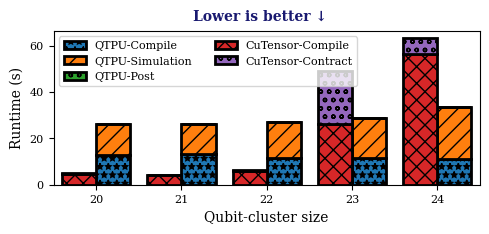

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 2), sharey=True)
fig.subplots_adjust(wspace=0.07)


# df = df[df["base_qubits"] % 20 == 0]
df = df.groupby(["max_qubits"]).mean()
# df_vqe = df_vqe[df_vqe["base_qubits"] % 20 == 0]

df[stack1].plot(
    kind="bar",
    stacked=True,
    position=0,
    rot=0,
    width=0.4,
    edgecolor="black",
    linewidth=2,
    ax=ax,
    legend=False,
    color=["#1f77b4", "#ff7f0e", "#2ca02c"],
)
df[stack2].plot(
    kind="bar",
    stacked=True,
    position=1,
    rot=0,
    width=0.4,
    edgecolor="black",
    linewidth=2,
    ax=ax,
    legend=False,
    color=["#d62728", "#9467bd"],
)

# ax.set_yscale("log")
# ax.legend(["QTPU-CPU", "QTPU-GPU", "CKT"])
ax.set_xlabel("Qubit-cluster size")
ax.set_ylabel("Runtime (s)")

# ax0.set_title("(a) VQE", fontweight="bold")
# ax1.set_title("(b) QAOA II", fontweight="bold")
ax.set_xlim([-0.5, len(df) - 0.5])

post(ax)
ax.legend(
    ["QTPU-Compile", "QTPU-Simulation", "QTPU-Post", "CuTensor-Compile", "CuTensor-Contract"],
    ncols=2,
    loc="upper left",
)
fig.text(
    0.5,
    0.95,
    "Lower is better ↓",
    ha="center",
    va="center",
    fontweight="bold",
    color="midnightblue",
)
fig;

In [63]:
fig.savefig("runtime_sim2.pdf", bbox_inches="tight")

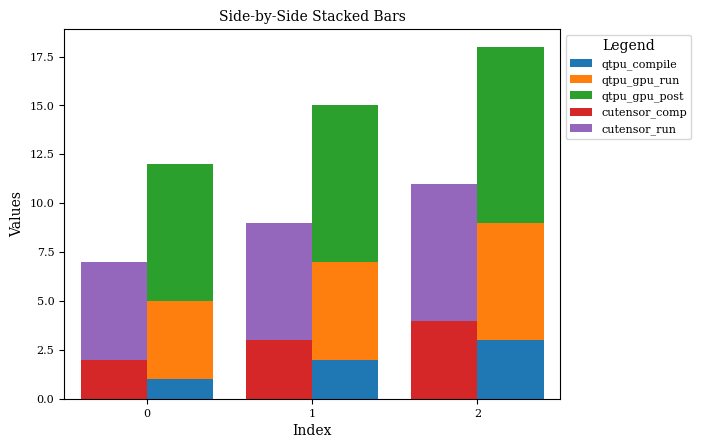

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "qtpu_compile": [1, 2, 3],
    "qtpu_gpu_run": [4, 5, 6],
    "qtpu_gpu_post": [7, 8, 9],
    "cutensor_comp": [2, 3, 4],
    "cutensor_run": [5, 6, 7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define the stacks
stack1 = ["qtpu_compile", "qtpu_gpu_run", "qtpu_gpu_post"]
stack2 = ["cutensor_comp", "cutensor_run"]

# Plot the stacks side by side
ax = df[stack1].plot(kind='bar', stacked=True, position=0, width=0.4, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
df[stack2].plot(kind='bar', stacked=True, position=1, width=0.4, color=['#d62728', '#9467bd'], ax=ax)


ax.set_xlim([-0.5, len(df) - 0.5])

# Adjust the plot
plt.title("Side-by-Side Stacked Bars")
plt.xlabel("Index")
plt.ylabel("Values")
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Legend")
plt.show()
